# Ejemplo de Análisis Exploratorio de Datos

## Tratamiento Matematico - ITM <br>

Cristian Guarnizo PhD

En este ejemplo se hara uso de TensorFlow 2.0 (TF2.0) para cargar los datos de Millas por Galon.  Empezamos instalando TF2.0

In [0]:
!pip install tensorflow==2.0.0

A continuacion importamos la librerias que necesitamos para este notebook.

In [0]:
#from __future__ import absolute_import, division, print_function

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow import keras

## Auto MPG Dataset 
Esta base de datos se emplea para hacer prediccion (modelo de regresion) a partir del peso, potencia, cilindraje y desplazamiento de diferentes tipos de vehiculos.

Descargamos la base de datos Auto MGP de la pagina de UCI, utilizando la siguiente linea.



In [0]:
dataset_path = keras.utils.get_file("auto-mpg.data", "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/root/.keras/datasets/auto-mpg.data'

Usamos la libreria Pandas para obtener una descrpicion estadistica del conjunto de datos. La descripcion de esta base de datos puede ser encontrada en [UCI_MGP_data_link](https://archive.ics.uci.edu/ml/datasets/auto+mpg). Continuamos definiendo los nombres de las columnas y leemos los valores del archivo que descargamos.

In [0]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin'] 
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


Revisamos si los datos contienen valores "nan". Si es asi, los eliminamos. La siguiente linea de comando nos indica cuantos registros son "nan".

In [0]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

Para mantener este ejemplo sencillo, eliminamos las final con "nan" ejecutando la siguiente linea.

In [0]:
dataset = dataset.dropna()

La columna "Origin" usa un valor entero para representa el pais donde el carro fue construido. Cambiamos esto por una representación "one-hot". Entonces, extraemos la columna Origin y la reemplazamos con tres nuevamos columnas que indican cada pais.

In [0]:
origin = dataset.pop('Origin')

dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


## Analisis Exploratorio de los datos

Ahora observamos las relaciones de que existen entre los datos, por medio de un scatter plot, donde en la diagonal estimamos la densidad de probabilidad por medio de KDE (Kernel Density Estimatio).

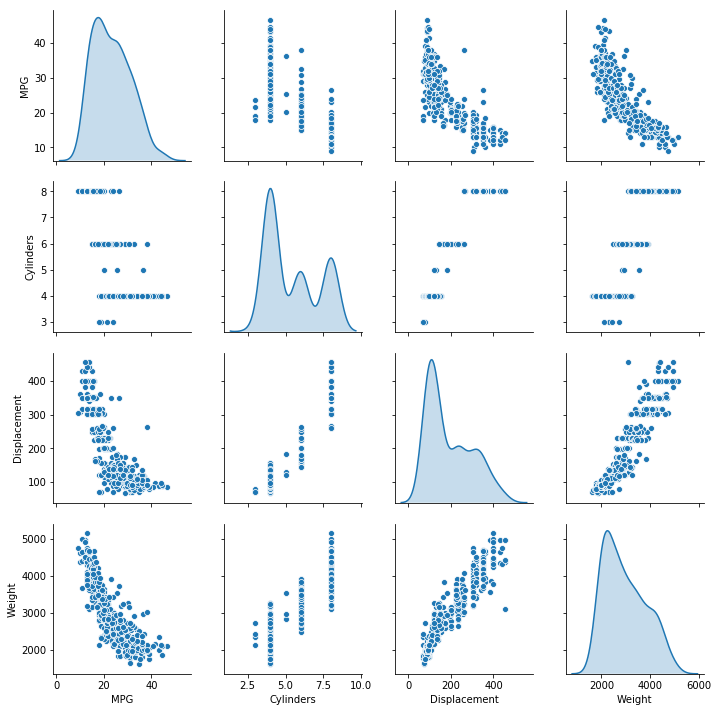

In [0]:
sns.pairplot(dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

La variable que tipicamente se emplea para predicción es MPG. Ahora observamos las correlaciones que existen entre todas la variables.

---



[]

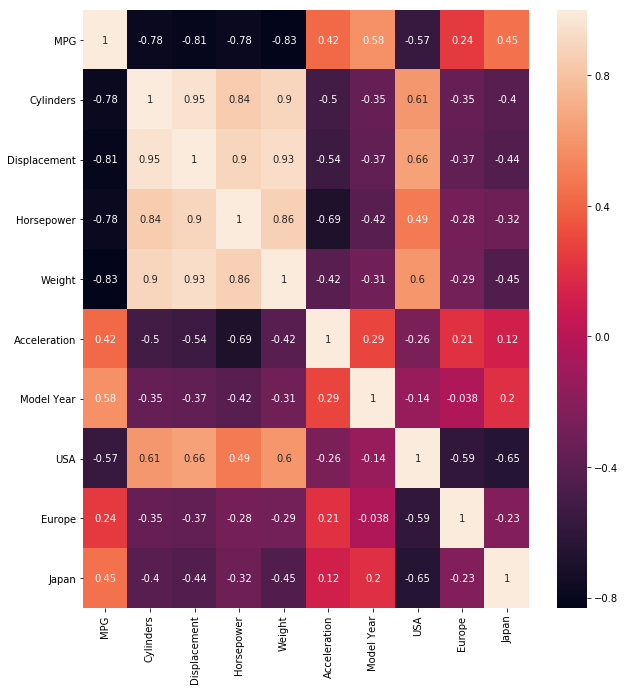

In [0]:
plt.figure(figsize=(10,11))
sns.heatmap(dataset.corr(), annot=True)
plt.plot()

Ahora analizamos con BoxPlots el comportamiento de cada variable.

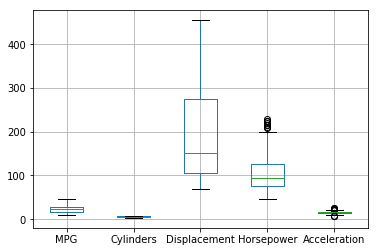

In [0]:
 dataset.boxplot(column=['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Acceleration'])